# Model Selection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql3
import random

random.seed(1000)
np.random.seed(1000)

sns.set(style="darkgrid")
ROOT_PATH="C:/Users/moshe/Documents/projectML/p1"
DATA_PATH = "%s/data/raw" % ROOT_PATH
DB_FILE = "%s/hairsalon.db" % DATA_PATH
def readSQL(query):
    import pandas as pd
    import sqlite3 as sql3
    db = sql3.connect(DB_FILE)
    df = pd.read_sql_query(query, db)
    db.close()
    return(df)

db=sql3.connect(DB_FILE)

In [9]:
def readXy(query):
    df=readSQL(query)
    for c in df.columns:
        if df[c].nunique() < 14:
            df[c] = df[c].astype('category')
    X=df.loc[:,df.columns[1:]]
    y=df['noshowflag']
    return X,y

query="""select * from test"""
Xtest,ytest=readXy(query)
query="""select * from Rtrain"""
XRtrain,yRtrain=readXy(query)

## Applying a simple Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()


/home/karpati/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [33]:
model.fit(X_train, y_train)

/home/karpati/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
model.score(X_train,y_train)

0.967032967032967

In [34]:
model.score(X_dev,y_dev)

0.9560439560439561

In [50]:
pred1 = model.predict_proba(X_dev)
print(pred1.shape)
print(y_dev.shape)


(91, 2)
(91,)


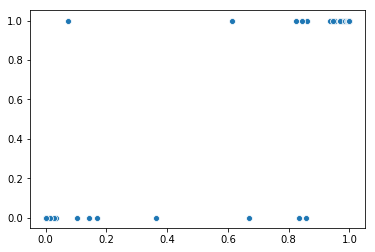

In [83]:
sns.scatterplot(pred1[:,1],y_dev)

## Changing to different solvers

In [65]:
#### liblinear
model = LogisticRegression(solver="liblinear", penalty='l1',max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
print("Accuracy - Train: %s, Dev: %s" % (model.score(X_train,y_train), model.score(X_dev,y_dev)))

Accuracy - Train: 0.9697802197802198, Dev: 0.9560439560439561


In [59]:
#### newton-cg
model = LogisticRegression(solver="newton-cg")
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
print("Accuracy - Train: %s, Dev: %s" % (model.score(X_train,y_train), model.score(X_dev,y_dev)))

Accuracy - Train: 0.967032967032967, Dev: 0.9560439560439561


In [68]:
#### lbfgs
model = LogisticRegression(solver="lbfgs",max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
print("Accuracy - Train: %s, Dev: %s" % (model.score(X_train,y_train), model.score(X_dev,y_dev)))

Accuracy - Train: 0.967032967032967, Dev: 0.9560439560439561


In [ ]:
from sklearn.preprocessing import normalize

X_train = normalize(X_train)
X_dev = normalize(X_dev)

In [123]:
#### sag
model = LogisticRegression(solver="sag", max_iter=10000,)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [124]:
print("Accuracy - Train: %s, Dev: %s" % (model.score(X_train,y_train), model.score(X_dev,y_dev)))

Accuracy - Train: 0.9175824175824175, Dev: 0.9340659340659341


In [135]:
#### saga w/l2
model = LogisticRegression(solver="saga", max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [136]:
print("Accuracy - Train: %s, Dev: %s" % (model.score(X_train,y_train), model.score(X_dev,y_dev)))

Accuracy - Train: 0.9175824175824175, Dev: 0.9230769230769231


In [76]:
#### saga w/l1
model = LogisticRegression(solver="saga", penalty='l1',max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [77]:
print("Accuracy - Train: %s, Dev: %s" % (model.score(X_train,y_train), model.score(X_dev,y_dev)))

Accuracy - Train: 0.9697802197802198, Dev: 0.9560439560439561


## Changing the C parameter

In [129]:
#### lbfgs
c_param = [1,10,100,1000, 10000, 1e06, 1e07]
res = []
for i in c_param:
    model = LogisticRegression(solver="lbfgs",max_iter=100000, C=i,random_state=123)
    model.fit(X_train, y_train)
    res.append([i, model.score(X_train,y_train), model.score(X_dev,y_dev)])
    print("C: %s | Train: %s | Dev: %s" % (i, model.score(X_train,y_train), model.score(X_dev,y_dev)))

res = pd.DataFrame(res, columns=['C','train','test'])

C: 1 | Train: 0.967032967032967 | Dev: 0.9560439560439561
C: 10 | Train: 0.9725274725274725 | Dev: 0.9560439560439561
C: 100 | Train: 0.9807692307692307 | Dev: 0.945054945054945
C: 1000 | Train: 0.9862637362637363 | Dev: 0.967032967032967
C: 10000 | Train: 0.9917582417582418 | Dev: 0.967032967032967
C: 1000000.0 | Train: 0.9917582417582418 | Dev: 0.967032967032967
C: 10000000.0 | Train: 0.9917582417582418 | Dev: 0.967032967032967


In [130]:
res

,C,train,test
0,1.0,0.967033,0.956044
1,10.0,0.972527,0.956044
2,100.0,0.980769,0.945055
3,1000.0,0.986264,0.967033
4,10000.0,0.991758,0.967033
5,1000000.0,0.991758,0.967033
6,10000000.0,0.991758,0.967033


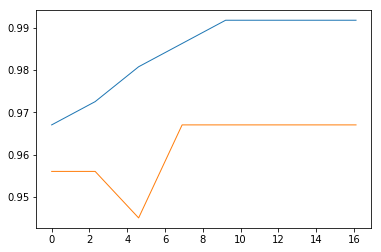

In [131]:
import matplotlib.pyplot as plt

plt.plot(np.log(res['C']), res['train'], lw=1)
plt.plot(np.log(res['C']), res['test'], lw=1)


## ROC/AUC curve

In [132]:
from sklearn.metrics import roc_curve, auc
pred1 = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred1, pos_label=1)

0.9692460317460316


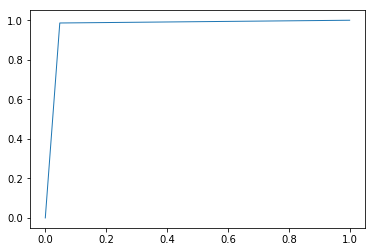

In [134]:
import matplotlib.pyplot as plt
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.plot(fpr, tpr, lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)